In [93]:
import pandas as pd


In [213]:
data = pd.read_csv("traindata.csv")

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 13 columns):
deadlift      86 non-null int64
benchpress    86 non-null int64
squat         86 non-null int64
pushup        86 non-null int64
situp         86 non-null int64
legpress      86 non-null int64
raw           86 non-null int64
rdl           86 non-null int64
lastpull      86 non-null int64
fly           86 non-null int64
curl          86 non-null int64
quality       86 non-null int64
passy         86 non-null int64
dtypes: int64(13)
memory usage: 8.8 KB


In [215]:
data.head()

,deadlift,benchpress,squat,pushup,situp,legpress,raw,rdl,lastpull,fly,curl,quality,passy
0,1648,660,1650,60,100,5660,500,300,500,200,300,6,0
1,1649,500,1651,61,101,5661,501,301,501,500,55,5,0
2,1650,505,1652,62,102,5662,502,302,502,300,0,4,0
3,1700,555,1653,63,103,5663,503,303,503,555,250,6,0
4,1111,355,1654,64,104,5664,504,304,504,633,123,2,0


In [216]:
data.describe()


,deadlift,benchpress,squat,pushup,situp,legpress,raw,rdl,lastpull,fly,curl,quality,passy
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1763.604651,543.790698,1658.104651,82.965116,297.662791,2322.755814,842.383721,57.162791,155.418605,110.697674,613.616279,5.325581,0.534884
std,357.589192,149.983067,724.112845,38.442760,211.644519,1455.187143,308.458222,74.747553,209.893332,123.517855,445.378680,2.166276,0.501707
min,1111.000000,346.000000,1102.000000,9.000000,100.000000,1111.000000,111.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000
25%,1579.250000,390.250000,1123.250000,64.250000,121.250000,1207.250000,786.250000,22.000000,39.250000,45.250000,138.750000,4.000000,0.000000
50%,1600.500000,518.500000,1211.500000,93.500000,158.500000,1668.500000,882.500000,29.500000,60.500000,64.500000,992.500000,5.000000,1.000000
75%,2107.750000,623.500000,2146.500000,113.750000,556.750000,3123.750000,895.750000,43.250000,221.750000,84.750000,1013.750000,7.000000,1.000000
max,3223.000000,849.000000,4521.000000,135.000000,611.000000,5670.000000,1559.000000,304.000000,1151.000000,633.000000,1035.000000,10.000000,1.000000


In [217]:
import numpy as np


In [218]:
np.any(data.isnull()==True)

False

In [219]:
import matplotlib.pyplot as plt

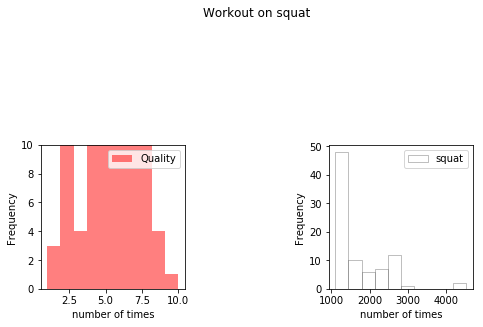

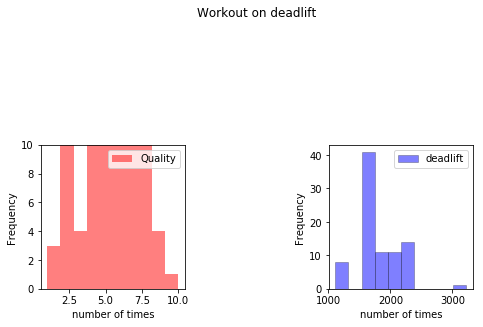

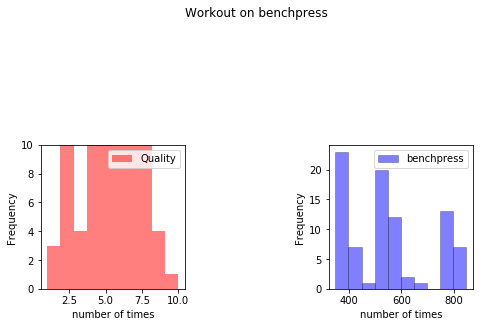

In [220]:
plt.figure(1)
fig,ax = plt.subplots(1,2)

ax[0].hist(data.quality, 10, facecolor='red', alpha=0.5, label="Quality")
ax[1].hist(data.squat, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="squat")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel("number of times")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("number of times")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Workout on squat")

plt.show()
plt.figure(2)
fig,ax = plt.subplots(1,2)

ax[0].hist(data.quality, 10, facecolor='red', alpha=0.5, label="Quality")
ax[1].hist(data.deadlift, 10, facecolor='blue', ec="black", lw=0.5, alpha=0.5, label="deadlift")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel("number of times")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("number of times")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Workout on deadlift")

plt.show()
plt.figure(3)
fig,ax = plt.subplots(1,2)

ax[0].hist(data.quality, 10, facecolor='red', alpha=0.5, label="Quality")
ax[1].hist(data.benchpress, 10, facecolor='blue', ec="black", lw=0.5, alpha=0.5, label="benchpress")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel("number of times")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("number of times")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Workout on benchpress")

plt.show()

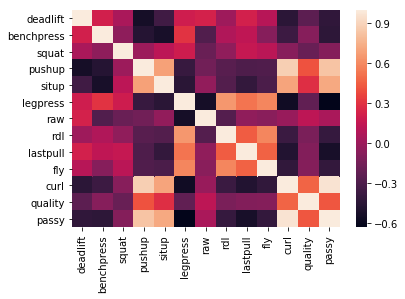

In [221]:
import seaborn as sns
%matplotlib inline

corr = data.corr() #计算协方差
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)
plt.show() #plt.show()

In [265]:
import numpy as np
#划分训练集合测试集
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:11]
y = np.ravel(data.quality)#降成一维，类似np.flatten(),但是np.flatten是拷贝，而ravel是引用
print (X)
print (y)
#X = data[:, 0:11]
#Y = data[:, 11]
#print(X)
#print(Y)
#随机划分训练集和测试集
#test_size:测试集占比
#random_state:随机种子，在需要重复试验的时候，保证得到一组一样的随机数。
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=33)

    deadlift  benchpress  squat  pushup  situp  legpress   raw  rdl  lastpull  \
0       1648         660   1650      60    100      5660   500  300       500   
1       1649         500   1651      61    101      5661   501  301       501   
2       1650         505   1652      62    102      5662   502  302       502   
3       1700         555   1653      63    103      5663   503  303       503   
4       1111         355   1654      64    104      5664   504  304       504   
5       2222         849   2000      65    105      5665   505  100       505   
6       2222         362   1222      66    106      5666   506  112       506   
7       2223         626   1212      67    107      5667   507  211         4   
8       2224         616   2600      68    108      5668   508  111      1151   
9       2225         800   2601      69    109      5669   509   66       222   
10      2226         801   2602      70    110      5670   111   77       251   
11      2112         802   2

In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-3.57187444e-01  8.21238857e-01  7.14380668e-02 -4.95856091e-01
  -8.98142772e-01  2.52783523e+00 -1.11526966e+00  3.18794456e+00
   1.72386883e+00  8.55891991e-01 -5.96584801e-01]
 [ 1.15229617e+00  5.07456552e-01  1.50204876e+00 -2.92702113e-01
  -8.60076678e-01  2.53374945e+00 -1.09043870e+00  6.80554128e-01
   4.97789267e+00  7.34194608e-02 -5.29189675e-01]
 [-5.06563426e-01 -1.17555763e+00  1.60445037e+00  1.12937573e+00
   1.26210805e+00 -4.25577252e-01 -2.18251102e-01 -6.32840860e-01
  -4.50478898e-01 -2.43086282e-01  1.02988422e+00]
 [ 3.77030680e+00 -2.12816468e-01 -6.87538554e-01  3.74231012e-02
  -7.98219275e-01 -7.64166218e-01  2.14689819e+00 -7.56429862e-02
   2.33368589e+00 -7.09053070e-01 -1.21886646e+00]
 [-5.53734789e-01  2.00805662e-01 -7.28198016e-01  6.72279282e-01
   1.32872372e+00 -8.24786949e-01  1.07655296e-01 -2.48108995e-01
  -5.40451907e-01 -4.01339153e-01  9.89447144e-01]
 [ 1.13657238e+00 -1.91422220e-01 -6.83020836e-01 -1.74017421e+00
  -7.83944490e-01 -

In [314]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=['accuracy'],optimizer='adam')
model.fit(X_train,y_train, nb_epoch=4500, batch_size=1, verbose=1)


/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/4500
57/57 [==============================] - 2s 36ms/step - loss: 25.6827 - acc: 0.0000e+00
Epoch 2/4500
57/57 [==============================] - 0s 5ms/step - loss: 11.5408 - acc: 0.1053
Epoch 3/4500
57/57 [==============================] - 0s 5ms/step - loss: 6.8775 - acc: 0.1053
Epoch 4/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.4665 - acc: 0.1404
Epoch 5/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.7111 - acc: 0.2807
Epoch 6/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.3027 - acc: 0.2982
Epoch 7/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.8761 - acc: 0.1930
Epoch 8/4500
57/57 [==============================] - 0s 4ms/step - loss: 3.6176 - acc: 0.1228
Epoch 9/4500
57/57 [==============================] - 0s 4ms/step - loss: 4.5837 - acc: 0.2105
Epoch 10/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.6434 - acc: 0.2281
Epoch 11/4500
57/57 [=====================

57/57 [==============================] - 0s 5ms/step - loss: 1.6584 - acc: 0.3860
Epoch 87/4500
57/57 [==============================] - 0s 5ms/step - loss: 1.4896 - acc: 0.3158
Epoch 88/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.1382 - acc: 0.4035
Epoch 89/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.4755 - acc: 0.3860
Epoch 90/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.5872 - acc: 0.3158
Epoch 91/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.9260 - acc: 0.4386
Epoch 92/4500
57/57 [==============================] - 0s 5ms/step - loss: 1.4096 - acc: 0.3684
Epoch 93/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.9440 - acc: 0.4035
Epoch 94/4500
57/57 [==============================] - 0s 5ms/step - loss: 1.4341 - acc: 0.4035
Epoch 95/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.0774 - acc: 0.4737
Epoch 96/4500
57/57 [==============================] -

57/57 [==============================] - 0s 5ms/step - loss: 0.8436 - acc: 0.4211
Epoch 171/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8950 - acc: 0.3860
Epoch 172/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.1082 - acc: 0.4386
Epoch 173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9247 - acc: 0.4561
Epoch 174/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.8846 - acc: 0.4912
Epoch 175/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.0303 - acc: 0.3860
Epoch 176/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7869 - acc: 0.4386
Epoch 177/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8110 - acc: 0.4386
Epoch 178/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9249 - acc: 0.5263
Epoch 179/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8003 - acc: 0.5088
Epoch 180/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.7237 - acc: 0.5614
Epoch 255/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7541 - acc: 0.5439
Epoch 256/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7051 - acc: 0.5088
Epoch 257/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7201 - acc: 0.6316
Epoch 258/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8110 - acc: 0.6316
Epoch 259/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7454 - acc: 0.5088
Epoch 260/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5538 - acc: 0.5965
Epoch 261/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6663 - acc: 0.4737
Epoch 262/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6557 - acc: 0.4737
Epoch 263/4500
57/57 [==============================] - 0s 5ms/step - loss: 1.0068 - acc: 0.4561
Epoch 264/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.6682 - acc: 0.5965
Epoch 339/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5894 - acc: 0.5614
Epoch 340/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6376 - acc: 0.5965
Epoch 341/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.9141 - acc: 0.5789
Epoch 342/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7992 - acc: 0.5439
Epoch 343/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.8019 - acc: 0.4737
Epoch 344/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7254 - acc: 0.5614
Epoch 345/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7385 - acc: 0.5263
Epoch 346/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6294 - acc: 0.5789
Epoch 347/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8766 - acc: 0.4561
Epoch 348/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.6676 - acc: 0.5789
Epoch 423/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7976 - acc: 0.4912
Epoch 424/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7324 - acc: 0.5965
Epoch 425/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6059 - acc: 0.6316
Epoch 426/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6817 - acc: 0.6316
Epoch 427/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8002 - acc: 0.5614
Epoch 428/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7365 - acc: 0.6667
Epoch 429/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8020 - acc: 0.5263
Epoch 430/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5445 - acc: 0.5263
Epoch 431/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7518 - acc: 0.5263
Epoch 432/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.4356 - acc: 0.6316
Epoch 507/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7630 - acc: 0.6316
Epoch 508/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5426 - acc: 0.5614
Epoch 509/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6991 - acc: 0.4912
Epoch 510/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5019 - acc: 0.6667
Epoch 511/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7113 - acc: 0.5263
Epoch 512/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4972 - acc: 0.5439
Epoch 513/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6121 - acc: 0.6316
Epoch 514/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8071 - acc: 0.5088
Epoch 515/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4931 - acc: 0.6491
Epoch 516/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.6896 - acc: 0.6140
Epoch 591/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6646 - acc: 0.7018
Epoch 592/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7497 - acc: 0.5263
Epoch 593/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8288 - acc: 0.5789
Epoch 594/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6647 - acc: 0.7018
Epoch 595/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8641 - acc: 0.5965
Epoch 596/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5016 - acc: 0.6842
Epoch 597/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4262 - acc: 0.5965
Epoch 598/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4361 - acc: 0.6667
Epoch 599/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8321 - acc: 0.7193
Epoch 600/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.8689 - acc: 0.6140
Epoch 675/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6384 - acc: 0.7193
Epoch 676/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6218 - acc: 0.5789
Epoch 677/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6170 - acc: 0.5965
Epoch 678/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5517 - acc: 0.6140
Epoch 679/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5944 - acc: 0.7018
Epoch 680/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4243 - acc: 0.6140
Epoch 681/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5152 - acc: 0.7018
Epoch 682/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4679 - acc: 0.6667
Epoch 683/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6218 - acc: 0.6140
Epoch 684/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.4352 - acc: 0.6140
Epoch 759/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7737 - acc: 0.6140
Epoch 760/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4516 - acc: 0.7544
Epoch 761/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6868 - acc: 0.6491
Epoch 762/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7463 - acc: 0.5614
Epoch 763/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6500 - acc: 0.6491
Epoch 764/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5913 - acc: 0.6316
Epoch 765/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6789 - acc: 0.6667
Epoch 766/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5156 - acc: 0.6140
Epoch 767/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6040 - acc: 0.5439
Epoch 768/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.6191 - acc: 0.6140
Epoch 843/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6547 - acc: 0.5789
Epoch 844/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6925 - acc: 0.5965
Epoch 845/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6230 - acc: 0.7544
Epoch 846/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5942 - acc: 0.5614
Epoch 847/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6083 - acc: 0.6842
Epoch 848/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6901 - acc: 0.5263
Epoch 849/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6467 - acc: 0.6491
Epoch 850/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5462 - acc: 0.5614
Epoch 851/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4775 - acc: 0.6491
Epoch 852/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.4339 - acc: 0.6842
Epoch 927/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7355 - acc: 0.6842
Epoch 928/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5065 - acc: 0.6316
Epoch 929/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5578 - acc: 0.6667
Epoch 930/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6116 - acc: 0.6316
Epoch 931/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7472 - acc: 0.5789
Epoch 932/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5221 - acc: 0.5965
Epoch 933/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5491 - acc: 0.6667
Epoch 934/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3916 - acc: 0.6316
Epoch 935/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6173 - acc: 0.5789
Epoch 936/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.5944 - acc: 0.7018
Epoch 1011/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5748 - acc: 0.6491
Epoch 1012/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5911 - acc: 0.6491
Epoch 1013/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4632 - acc: 0.6842
Epoch 1014/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4871 - acc: 0.5789
Epoch 1015/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5952 - acc: 0.6491
Epoch 1016/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4917 - acc: 0.7018
Epoch 1017/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5303 - acc: 0.7193
Epoch 1018/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6367 - acc: 0.6667
Epoch 1019/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5093 - acc: 0.6842
Epoch 1020/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.4629 - acc: 0.5614
Epoch 1094/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6135 - acc: 0.6316
Epoch 1095/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4175 - acc: 0.7193
Epoch 1096/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4420 - acc: 0.7368
Epoch 1097/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4444 - acc: 0.5965
Epoch 1098/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9008 - acc: 0.5965
Epoch 1099/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5281 - acc: 0.7193
Epoch 1100/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9131 - acc: 0.5789
Epoch 1101/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4040 - acc: 0.7368
Epoch 1102/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4458 - acc: 0.7193
Epoch 1103/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.4265 - acc: 0.7193
Epoch 1177/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5048 - acc: 0.5965
Epoch 1178/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6747 - acc: 0.6491
Epoch 1179/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4598 - acc: 0.6842
Epoch 1180/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5602 - acc: 0.6842
Epoch 1181/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6348 - acc: 0.6667
Epoch 1182/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5217 - acc: 0.6491
Epoch 1183/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3844 - acc: 0.7544
Epoch 1184/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5541 - acc: 0.6140
Epoch 1185/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5417 - acc: 0.6667
Epoch 1186/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.5178 - acc: 0.6667
Epoch 1260/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5139 - acc: 0.6491
Epoch 1261/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4143 - acc: 0.7368
Epoch 1262/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5496 - acc: 0.6842
Epoch 1263/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6907 - acc: 0.6316
Epoch 1264/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3895 - acc: 0.7193
Epoch 1265/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4223 - acc: 0.7193
Epoch 1266/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4477 - acc: 0.7544
Epoch 1267/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4837 - acc: 0.6140
Epoch 1268/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4686 - acc: 0.7544
Epoch 1269/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3744 - acc: 0.7368
Epoch 1343/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7435 - acc: 0.5965
Epoch 1344/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3986 - acc: 0.7368
Epoch 1345/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5997 - acc: 0.7193
Epoch 1346/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3895 - acc: 0.6316
Epoch 1347/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3551 - acc: 0.7719
Epoch 1348/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3166 - acc: 0.6842
Epoch 1349/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5160 - acc: 0.7018
Epoch 1350/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3131 - acc: 0.7544
Epoch 1351/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7119 - acc: 0.5789
Epoch 1352/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3958 - acc: 0.7719
Epoch 1426/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5037 - acc: 0.7193
Epoch 1427/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7345 - acc: 0.6667
Epoch 1428/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3911 - acc: 0.6491
Epoch 1429/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4445 - acc: 0.6667
Epoch 1430/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6067 - acc: 0.6667
Epoch 1431/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.8041 - acc: 0.6667
Epoch 1432/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4655 - acc: 0.7368
Epoch 1433/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4918 - acc: 0.6316
Epoch 1434/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4619 - acc: 0.7544
Epoch 1435/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3197 - acc: 0.6667
Epoch 1509/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3963 - acc: 0.7193
Epoch 1510/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3817 - acc: 0.7719
Epoch 1511/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6160 - acc: 0.6316
Epoch 1512/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4881 - acc: 0.7544
Epoch 1513/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3962 - acc: 0.7193
Epoch 1514/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4234 - acc: 0.5965
Epoch 1515/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4250 - acc: 0.7544
Epoch 1516/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4593 - acc: 0.6842
Epoch 1517/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.7895
Epoch 1518/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4455 - acc: 0.6316
Epoch 1592/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4660 - acc: 0.7368
Epoch 1593/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2907 - acc: 0.6842
Epoch 1594/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4949 - acc: 0.7544
Epoch 1595/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6566 - acc: 0.7193
Epoch 1596/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5153 - acc: 0.6667
Epoch 1597/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5843 - acc: 0.7193
Epoch 1598/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4900 - acc: 0.6842
Epoch 1599/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5777 - acc: 0.7719
Epoch 1600/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3506 - acc: 0.7544
Epoch 1601/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4985 - acc: 0.6667
Epoch 1675/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5938 - acc: 0.6316
Epoch 1676/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6796 - acc: 0.6491
Epoch 1677/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5342 - acc: 0.5965
Epoch 1678/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4960 - acc: 0.6491
Epoch 1679/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4161 - acc: 0.7193
Epoch 1680/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4369 - acc: 0.7368
Epoch 1681/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4373 - acc: 0.6667
Epoch 1682/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5229 - acc: 0.6491
Epoch 1683/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.0388 - acc: 0.6316
Epoch 1684/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4562 - acc: 0.7018
Epoch 1758/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4222 - acc: 0.6842
Epoch 1759/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4254 - acc: 0.6667
Epoch 1760/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5230 - acc: 0.6316
Epoch 1761/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5312 - acc: 0.6842
Epoch 1762/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6426 - acc: 0.6842
Epoch 1763/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4153 - acc: 0.7368
Epoch 1764/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7350 - acc: 0.6842
Epoch 1765/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4225 - acc: 0.7018
Epoch 1766/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5141 - acc: 0.7018
Epoch 1767/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3957 - acc: 0.6491
Epoch 1841/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4702 - acc: 0.7193
Epoch 1842/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4319 - acc: 0.6491
Epoch 1843/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5032 - acc: 0.6842
Epoch 1844/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4164 - acc: 0.6842
Epoch 1845/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6074 - acc: 0.6667
Epoch 1846/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5516 - acc: 0.7018
Epoch 1847/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3589 - acc: 0.7368
Epoch 1848/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3641 - acc: 0.6667
Epoch 1849/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7318 - acc: 0.6491
Epoch 1850/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.7663 - acc: 0.5614
Epoch 1924/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5540 - acc: 0.6316
Epoch 1925/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3449 - acc: 0.8070
Epoch 1926/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4790 - acc: 0.6667
Epoch 1927/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3727 - acc: 0.7193
Epoch 1928/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5245 - acc: 0.6667
Epoch 1929/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4611 - acc: 0.7544
Epoch 1930/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3858 - acc: 0.7368
Epoch 1931/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4105 - acc: 0.6842
Epoch 1932/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4753 - acc: 0.7368
Epoch 1933/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4127 - acc: 0.6842
Epoch 2007/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4920 - acc: 0.5965
Epoch 2008/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3614 - acc: 0.7193
Epoch 2009/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2390 - acc: 0.7719
Epoch 2010/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4715 - acc: 0.6667
Epoch 2011/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4152 - acc: 0.7895
Epoch 2012/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5466 - acc: 0.7193
Epoch 2013/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4141 - acc: 0.6842
Epoch 2014/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4208 - acc: 0.6316
Epoch 2015/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5415 - acc: 0.5965
Epoch 2016/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3146 - acc: 0.7544
Epoch 2090/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4986 - acc: 0.5789
Epoch 2091/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5603 - acc: 0.6140
Epoch 2092/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3780 - acc: 0.6491
Epoch 2093/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5006 - acc: 0.6667
Epoch 2094/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4364 - acc: 0.7018
Epoch 2095/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4506 - acc: 0.6842
Epoch 2096/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3760 - acc: 0.6842
Epoch 2097/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3727 - acc: 0.6842
Epoch 2098/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3118 - acc: 0.7895
Epoch 2099/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4061 - acc: 0.8070
Epoch 2173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4713 - acc: 0.6842
Epoch 2174/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4183 - acc: 0.7368
Epoch 2175/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4822 - acc: 0.7018
Epoch 2176/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5553 - acc: 0.5965
Epoch 2177/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4489 - acc: 0.7368
Epoch 2178/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4501 - acc: 0.7018
Epoch 2179/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3640 - acc: 0.6842
Epoch 2180/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5894 - acc: 0.6491
Epoch 2181/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6740 - acc: 0.7193
Epoch 2182/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3781 - acc: 0.6316
Epoch 2256/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4570 - acc: 0.6316
Epoch 2257/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3224 - acc: 0.7018
Epoch 2258/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3119 - acc: 0.7719
Epoch 2259/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5870 - acc: 0.6316
Epoch 2260/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5232 - acc: 0.6842
Epoch 2261/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7750 - acc: 0.7018
Epoch 2262/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4064 - acc: 0.6491
Epoch 2263/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4596 - acc: 0.6491
Epoch 2264/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4943 - acc: 0.6667
Epoch 2265/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3295 - acc: 0.6316
Epoch 2339/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4874 - acc: 0.6491
Epoch 2340/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5213 - acc: 0.7368
Epoch 2341/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5003 - acc: 0.6667
Epoch 2342/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5633 - acc: 0.6842
Epoch 2343/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4507 - acc: 0.6140
Epoch 2344/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4334 - acc: 0.6667
Epoch 2345/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5682 - acc: 0.6140
Epoch 2346/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6130 - acc: 0.7018
Epoch 2347/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4265 - acc: 0.7193
Epoch 2348/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4965 - acc: 0.5439
Epoch 2422/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3751 - acc: 0.6667
Epoch 2423/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9867 - acc: 0.6842
Epoch 2424/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4150 - acc: 0.7193
Epoch 2425/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2891 - acc: 0.6842
Epoch 2426/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4098 - acc: 0.7018
Epoch 2427/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3144 - acc: 0.7895
Epoch 2428/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4226 - acc: 0.6491
Epoch 2429/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4246 - acc: 0.6667
Epoch 2430/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4764 - acc: 0.7719
Epoch 2431/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2826 - acc: 0.7193
Epoch 2505/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4112 - acc: 0.7895
Epoch 2506/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2647 - acc: 0.7719
Epoch 2507/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2240 - acc: 0.8246
Epoch 2508/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3446 - acc: 0.6316
Epoch 2509/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4389 - acc: 0.6842
Epoch 2510/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3920 - acc: 0.7895
Epoch 2511/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3144 - acc: 0.7018
Epoch 2512/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7389 - acc: 0.6491
Epoch 2513/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3703 - acc: 0.7719
Epoch 2514/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4316 - acc: 0.7193
Epoch 2588/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3586 - acc: 0.7018
Epoch 2589/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4635 - acc: 0.6140
Epoch 2590/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4075 - acc: 0.6491
Epoch 2591/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4417 - acc: 0.6667
Epoch 2592/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4340 - acc: 0.7368
Epoch 2593/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3765 - acc: 0.7544
Epoch 2594/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4411 - acc: 0.7719
Epoch 2595/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3409 - acc: 0.7193
Epoch 2596/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7058 - acc: 0.6491
Epoch 2597/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4090 - acc: 0.7719
Epoch 2671/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3587 - acc: 0.7368
Epoch 2672/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3389 - acc: 0.7719
Epoch 2673/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2614 - acc: 0.7719
Epoch 2674/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3548 - acc: 0.7018
Epoch 2675/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2537 - acc: 0.7544
Epoch 2676/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4448 - acc: 0.6491
Epoch 2677/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3692 - acc: 0.7193
Epoch 2678/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4499 - acc: 0.7193
Epoch 2679/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2538 - acc: 0.7895
Epoch 2680/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3819 - acc: 0.6842
Epoch 2754/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3164 - acc: 0.7018
Epoch 2755/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2504 - acc: 0.7895
Epoch 2756/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3686 - acc: 0.7368
Epoch 2757/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3877 - acc: 0.7368
Epoch 2758/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6239 - acc: 0.7193
Epoch 2759/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2983 - acc: 0.7193
Epoch 2760/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2416 - acc: 0.7368
Epoch 2761/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2966 - acc: 0.7368
Epoch 2762/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4079 - acc: 0.6140
Epoch 2763/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2624 - acc: 0.7719
Epoch 2837/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2931 - acc: 0.7018
Epoch 2838/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3690 - acc: 0.7719
Epoch 2839/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2483 - acc: 0.7368
Epoch 2840/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3575 - acc: 0.7368
Epoch 2841/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3525 - acc: 0.7193
Epoch 2842/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3617 - acc: 0.7544
Epoch 2843/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2967 - acc: 0.6842
Epoch 2844/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4046 - acc: 0.8070
Epoch 2845/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4694 - acc: 0.7544
Epoch 2846/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2830 - acc: 0.7544
Epoch 2920/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4000 - acc: 0.6842
Epoch 2921/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2446 - acc: 0.7368
Epoch 2922/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3063 - acc: 0.7368
Epoch 2923/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2575 - acc: 0.8246
Epoch 2924/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3864 - acc: 0.6491
Epoch 2925/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5723 - acc: 0.6316
Epoch 2926/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5127 - acc: 0.6316
Epoch 2927/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3317 - acc: 0.7193
Epoch 2928/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2756 - acc: 0.7193
Epoch 2929/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2747 - acc: 0.7895
Epoch 3003/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3982 - acc: 0.7368
Epoch 3004/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3562 - acc: 0.6842
Epoch 3005/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6332 - acc: 0.6667
Epoch 3006/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2863 - acc: 0.7544
Epoch 3007/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3064 - acc: 0.7018
Epoch 3008/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3468 - acc: 0.7719
Epoch 3009/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2858 - acc: 0.7193
Epoch 3010/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2970 - acc: 0.6667
Epoch 3011/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3100 - acc: 0.7018
Epoch 3012/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2783 - acc: 0.7368
Epoch 3086/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6988 - acc: 0.7544
Epoch 3087/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2404 - acc: 0.7544
Epoch 3088/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5281 - acc: 0.7544
Epoch 3089/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3762 - acc: 0.5965
Epoch 3090/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3403 - acc: 0.7368
Epoch 3091/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3092 - acc: 0.7193
Epoch 3092/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2244 - acc: 0.8421
Epoch 3093/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2594 - acc: 0.7719
Epoch 3094/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3290 - acc: 0.7018
Epoch 3095/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2386 - acc: 0.8070
Epoch 3169/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3049 - acc: 0.7368
Epoch 3170/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5311 - acc: 0.6667
Epoch 3171/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3270 - acc: 0.7018
Epoch 3172/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2437 - acc: 0.7018
Epoch 3173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3622 - acc: 0.7719
Epoch 3174/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4789 - acc: 0.7368
Epoch 3175/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3295 - acc: 0.7193
Epoch 3176/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2816 - acc: 0.7193
Epoch 3177/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3928 - acc: 0.7544
Epoch 3178/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3008 - acc: 0.7368
Epoch 3252/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2268 - acc: 0.7895
Epoch 3253/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3007 - acc: 0.6667
Epoch 3254/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3045 - acc: 0.7018
Epoch 3255/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3465 - acc: 0.7018
Epoch 3256/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2775 - acc: 0.7895
Epoch 3257/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2407 - acc: 0.7193
Epoch 3258/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3098 - acc: 0.7719
Epoch 3259/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3941 - acc: 0.7368
Epoch 3260/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3682 - acc: 0.7193
Epoch 3261/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2180 - acc: 0.7895
Epoch 3335/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2359 - acc: 0.7368
Epoch 3336/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1592 - acc: 0.7895
Epoch 3337/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2433 - acc: 0.7544
Epoch 3338/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2408 - acc: 0.7544
Epoch 3339/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1932 - acc: 0.8070
Epoch 3340/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3156 - acc: 0.6491
Epoch 3341/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3029 - acc: 0.7719
Epoch 3342/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2314 - acc: 0.7895
Epoch 3343/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5401 - acc: 0.7193
Epoch 3344/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4279 - acc: 0.7544
Epoch 3418/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3573 - acc: 0.6842
Epoch 3419/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3460 - acc: 0.7895
Epoch 3420/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2202 - acc: 0.7719
Epoch 3421/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3515 - acc: 0.7719
Epoch 3422/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2772 - acc: 0.7544
Epoch 3423/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2314 - acc: 0.7719
Epoch 3424/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2231 - acc: 0.7368
Epoch 3425/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3854 - acc: 0.7018
Epoch 3426/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2962 - acc: 0.6667
Epoch 3427/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3611 - acc: 0.6491
Epoch 3501/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3351 - acc: 0.6491
Epoch 3502/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3270 - acc: 0.7895
Epoch 3503/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3135 - acc: 0.7544
Epoch 3504/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2594 - acc: 0.7719
Epoch 3505/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2646 - acc: 0.6842
Epoch 3506/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2981 - acc: 0.7895
Epoch 3507/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7504 - acc: 0.6667
Epoch 3508/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3226 - acc: 0.7193
Epoch 3509/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2822 - acc: 0.7368
Epoch 3510/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4483 - acc: 0.7719
Epoch 3584/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3495 - acc: 0.7018
Epoch 3585/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5786 - acc: 0.7193
Epoch 3586/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2789 - acc: 0.7719
Epoch 3587/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3100 - acc: 0.7368
Epoch 3588/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3198 - acc: 0.6316
Epoch 3589/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3811 - acc: 0.6842
Epoch 3590/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2613 - acc: 0.7544
Epoch 3591/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2386 - acc: 0.7368
Epoch 3592/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2665 - acc: 0.7368
Epoch 3593/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.4335 - acc: 0.7544
Epoch 3667/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4530 - acc: 0.6842
Epoch 3668/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4837 - acc: 0.6140
Epoch 3669/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2829 - acc: 0.6842
Epoch 3670/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2765 - acc: 0.8070
Epoch 3671/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1978 - acc: 0.7368
Epoch 3672/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2764 - acc: 0.6842
Epoch 3673/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2669 - acc: 0.7193
Epoch 3674/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3500 - acc: 0.7193
Epoch 3675/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3327 - acc: 0.7544
Epoch 3676/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.4539 - acc: 0.7368
Epoch 3750/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4308 - acc: 0.7368
Epoch 3751/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2285 - acc: 0.7544
Epoch 3752/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3941 - acc: 0.7368
Epoch 3753/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2206 - acc: 0.8246
Epoch 3754/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2341 - acc: 0.8070
Epoch 3755/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2212 - acc: 0.7895
Epoch 3756/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3308 - acc: 0.7368
Epoch 3757/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2752 - acc: 0.7368
Epoch 3758/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2844 - acc: 0.7719
Epoch 3759/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2124 - acc: 0.7193
Epoch 3833/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3254 - acc: 0.7719
Epoch 3834/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2418 - acc: 0.7018
Epoch 3835/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4745 - acc: 0.7368
Epoch 3836/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3076 - acc: 0.7544
Epoch 3837/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2203 - acc: 0.7719
Epoch 3838/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1770 - acc: 0.8246
Epoch 3839/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4468 - acc: 0.8070
Epoch 3840/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2902 - acc: 0.8070
Epoch 3841/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2820 - acc: 0.7895
Epoch 3842/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3739 - acc: 0.7368
Epoch 3916/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4102 - acc: 0.7018
Epoch 3917/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2972 - acc: 0.7895
Epoch 3918/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3051 - acc: 0.7544
Epoch 3919/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4072 - acc: 0.6491
Epoch 3920/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2812 - acc: 0.7719
Epoch 3921/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4271 - acc: 0.7719
Epoch 3922/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3737 - acc: 0.7368
Epoch 3923/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2073 - acc: 0.8246
Epoch 3924/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2174 - acc: 0.7895
Epoch 3925/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2733 - acc: 0.7719
Epoch 3999/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1736 - acc: 0.8596
Epoch 4000/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3930 - acc: 0.7368
Epoch 4001/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2691 - acc: 0.7544
Epoch 4002/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1853 - acc: 0.8070
Epoch 4003/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2115 - acc: 0.8070
Epoch 4004/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3246 - acc: 0.8421
Epoch 4005/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3874 - acc: 0.7719
Epoch 4006/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2640 - acc: 0.7895
Epoch 4007/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1557 - acc: 0.8421
Epoch 4008/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4025 - acc: 0.6667
Epoch 4082/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1924 - acc: 0.7895
Epoch 4083/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2461 - acc: 0.7368
Epoch 4084/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2732 - acc: 0.7544
Epoch 4085/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4116 - acc: 0.8070
Epoch 4086/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2773 - acc: 0.6667
Epoch 4087/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2149 - acc: 0.8246
Epoch 4088/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7381 - acc: 0.7719
Epoch 4089/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2201 - acc: 0.7719
Epoch 4090/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2925 - acc: 0.7719
Epoch 4091/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.5903 - acc: 0.7368
Epoch 4165/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2171 - acc: 0.7719
Epoch 4166/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1807 - acc: 0.8246
Epoch 4167/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3639 - acc: 0.7719
Epoch 4168/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3666 - acc: 0.7719
Epoch 4169/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1502 - acc: 0.8421
Epoch 4170/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1648 - acc: 0.8070
Epoch 4171/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1800 - acc: 0.7895
Epoch 4172/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1047 - acc: 0.8596
Epoch 4173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2034 - acc: 0.8246
Epoch 4174/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2691 - acc: 0.6842
Epoch 4248/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3049 - acc: 0.7719
Epoch 4249/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6230 - acc: 0.7368
Epoch 4250/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3518 - acc: 0.7193
Epoch 4251/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2296 - acc: 0.8070
Epoch 4252/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2062 - acc: 0.8246
Epoch 4253/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2046 - acc: 0.7895
Epoch 4254/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3141 - acc: 0.7895
Epoch 4255/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2788 - acc: 0.8246
Epoch 4256/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1878 - acc: 0.7895
Epoch 4257/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3080 - acc: 0.7895
Epoch 4331/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1960 - acc: 0.7719
Epoch 4332/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1913 - acc: 0.7544
Epoch 4333/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3011 - acc: 0.7719
Epoch 4334/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2972 - acc: 0.7368
Epoch 4335/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6538 - acc: 0.7368
Epoch 4336/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3415 - acc: 0.7544
Epoch 4337/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6026 - acc: 0.7719
Epoch 4338/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4355 - acc: 0.7018
Epoch 4339/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1966 - acc: 0.8421
Epoch 4340/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.1379 - acc: 0.8246
Epoch 4414/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6630 - acc: 0.7018
Epoch 4415/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1924 - acc: 0.7719
Epoch 4416/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2317 - acc: 0.7368
Epoch 4417/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2790 - acc: 0.7193
Epoch 4418/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5348 - acc: 0.7895
Epoch 4419/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3026 - acc: 0.7018
Epoch 4420/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3402 - acc: 0.7719
Epoch 4421/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2593 - acc: 0.7368
Epoch 4422/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2682 - acc: 0.7544
Epoch 4423/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2188 - acc: 0.7544
Epoch 4497/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2652 - acc: 0.7895
Epoch 4498/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2681 - acc: 0.7719
Epoch 4499/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2061 - acc: 0.8246
Epoch 4500/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1920 - acc: 0.7719


In [315]:
 model.output_shape

(None, 1)

In [316]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                240       
_________________________________________________________________
dense_145 (Dense)            (None, 10)                210       
_________________________________________________________________
dropout_46 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 20)                220       
_________________________________________________________________
dropout_47 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 21        
Total para

In [317]:
model.get_weights()

[array([[-0.6898456 ,  0.163836  , -0.08418517, -0.7209041 , -0.63458925,
         -0.02246013, -0.614258  ,  0.27255502,  0.41120487,  0.53525496,
         -0.6010641 ,  0.57625127, -0.30134937, -0.3391464 , -0.36518195,
         -0.43687233,  0.12744667, -0.5407145 , -0.8625713 ,  0.02581161],
        [ 0.7522569 , -0.48379833,  0.06528372, -0.20384435, -0.3796704 ,
          0.10547602, -0.02636588,  0.20988066,  0.20625846, -0.27889562,
         -0.61015415, -0.2897977 , -0.41022092,  0.45921   , -0.22616045,
          0.31862336,  0.44729042, -1.0125259 , -0.57643455,  0.30169237],
        [ 0.73473984, -0.8273369 , -0.73262644,  0.783503  , -0.08632772,
         -0.46412617,  0.05841867, -0.80454546,  0.14702974,  1.0798864 ,
         -1.0355512 ,  0.7199609 , -0.06232825,  0.06493335, -0.4145092 ,
          0.30449873,  1.0000322 , -0.40529895, -0.05779876,  0.065124  ],
        [-0.62872005,  0.55158645,  0.34704432, -0.57087976, -0.7011476 ,
         -0.10282988, -1.0629892 , 

In [318]:
#score = model.evaluate(X_test, y_test, batch_size=16)

In [319]:
#y_pred = model.predict(X_test)
#print (y_pred[:10])

In [320]:
#print (y_test[:10])

In [321]:
score = model.evaluate(X_test,y_test,verbose=1)
print (score)

29/29 [==============================] - 1s 25ms/step
[6.327003002166748, 0.2068965584039688]


In [322]:
y_pred = model.predict(X_test)
print (y_pred[:10])

[[4.246557 ]
 [3.9497454]
 [6.4943047]
 [4.0678368]
 [4.3331776]
 [5.453618 ]
 [3.672788 ]
 [4.540086 ]
 [4.7016015]
 [4.169066 ]]


In [323]:
print (y_test[:10])

[8 4 8 6 4 9 5 2 5 6]
